# House Prices Predicting

In [74]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import skew,norm

In [2]:
# 데이터 불러오기
df_origin = pd.read_csv('train.csv')

In [3]:
# 컬럼 확인
df_origin.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [34]:
len(df_origin.columns)

81

In [4]:
# 필요없는 컬럼 'Id' 제거
df = df_origin.drop('Id', axis=1)

In [5]:
# 트레인셋 & 테스트셋 으로 분리
df_train, df_test = train_test_split(df, train_size= 0.7, test_size = 0.3)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 1103 to 312
Data columns (total 80 columns):
MSSubClass       1021 non-null int64
MSZoning         1021 non-null object
LotFrontage      844 non-null float64
LotArea          1021 non-null int64
Street           1021 non-null object
Alley            63 non-null object
LotShape         1021 non-null object
LandContour      1021 non-null object
Utilities        1021 non-null object
LotConfig        1021 non-null object
LandSlope        1021 non-null object
Neighborhood     1021 non-null object
Condition1       1021 non-null object
Condition2       1021 non-null object
BldgType         1021 non-null object
HouseStyle       1021 non-null object
OverallQual      1021 non-null int64
OverallCond      1021 non-null int64
YearBuilt        1021 non-null int64
YearRemodAdd     1021 non-null int64
RoofStyle        1021 non-null object
RoofMatl         1021 non-null object
Exterior1st      1021 non-null object
Exterior2nd      1021 non

In [50]:
# 예측값인 'SalePrice' 컬럼 파악하기
df_train['SalePrice'].describe()

count      1021.000000
mean     182653.776690
std       79238.873752
min       37900.000000
25%      130000.000000
50%      165000.000000
75%      216837.000000
max      745000.000000
Name: SalePrice, dtype: float64

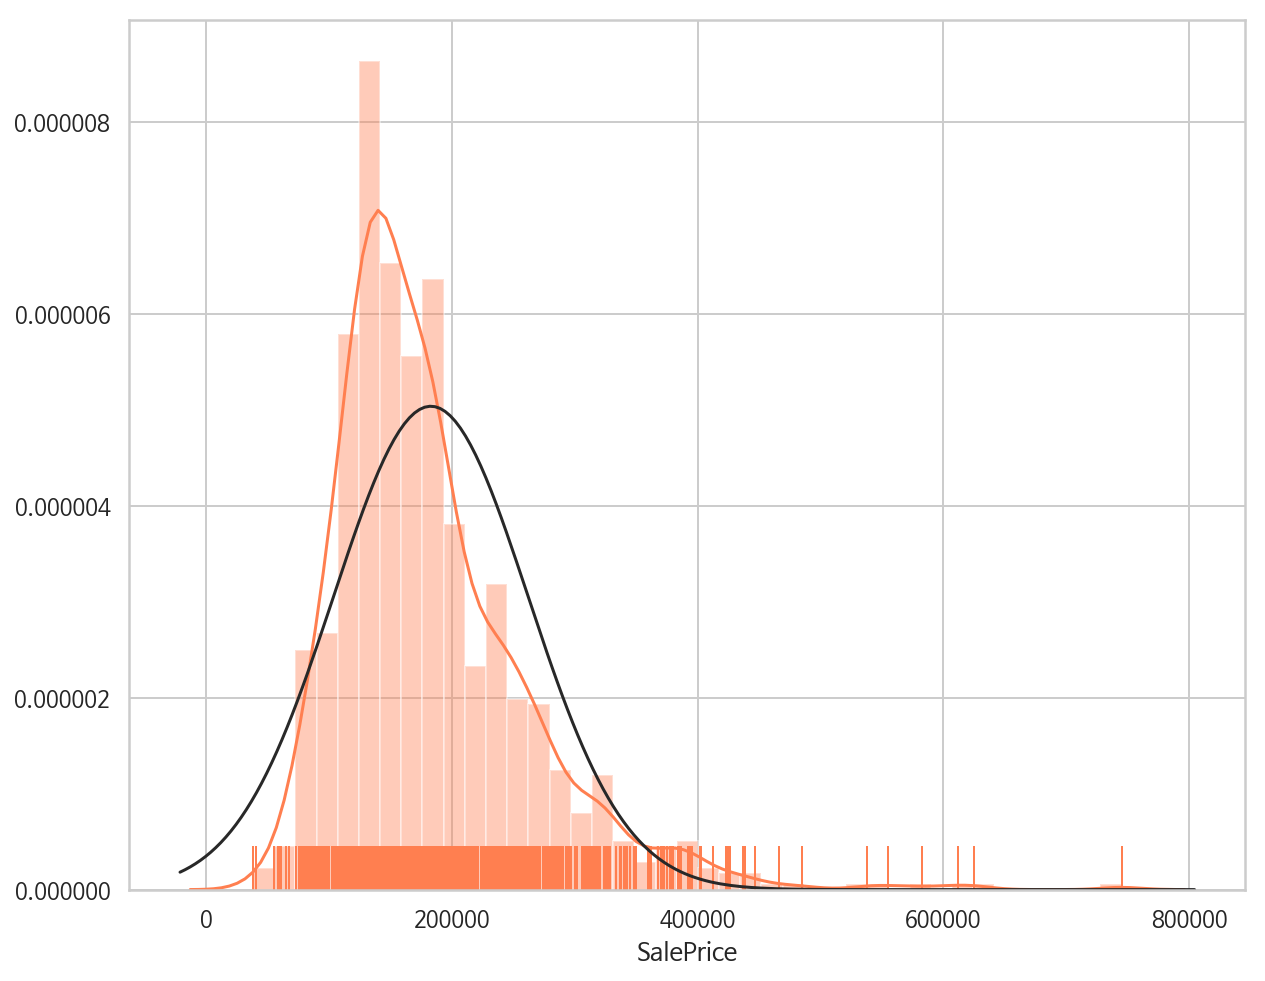

In [72]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['SalePrice'], color='coral', fit=norm, rug=True)

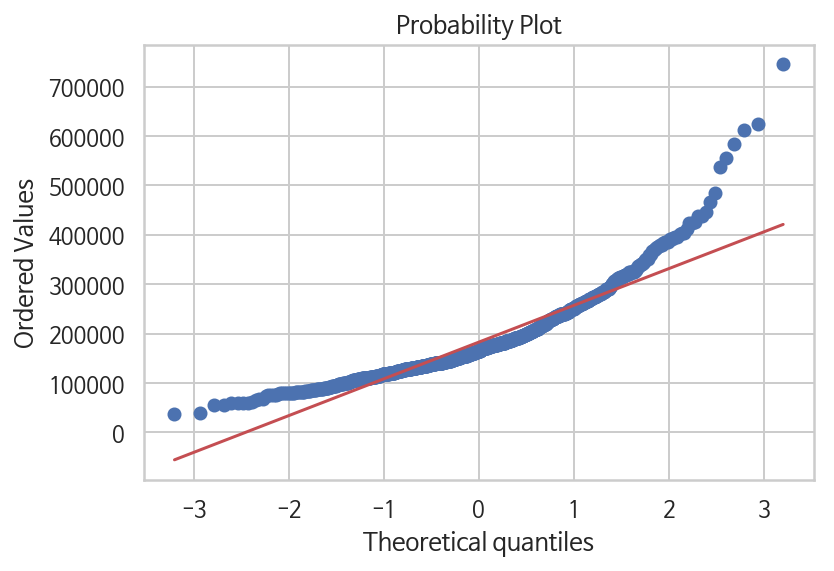

In [78]:
# normal distribution check
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [84]:
# 'SalePrice' 와 상관관계가 있는 컬럼 상위 10개 분류
corrlist = df_train.corr().nlargest(10, 'SalePrice').index
df_train[corrlist].corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
SalePrice,1.000000,0.791642,0.690530,0.642398,0.615275,0.592976,0.587718,0.564763,0.533371,0.529643
OverallQual,0.791642,1.000000,0.589947,0.593980,0.551732,0.534016,0.485422,0.565896,0.428017,0.581635
GrLivArea,0.690530,0.589947,1.000000,0.453232,0.460576,0.461043,0.565646,0.627078,0.827028,0.185500
GarageCars,0.642398,0.593980,0.453232,1.000000,0.876211,0.434249,0.416793,0.475204,0.344175,0.534017
GarageArea,0.615275,0.551732,0.460576,0.876211,1.000000,0.496399,0.475571,0.407919,0.323826,0.474054
TotalBsmtSF,0.592976,0.534016,0.461043,0.434249,0.496399,1.000000,0.835042,0.319400,0.292386,0.385395
1stFlrSF,0.587718,0.485422,0.565646,0.416793,0.475571,0.835042,1.000000,0.369993,0.402534,0.276304
FullBath,0.564763,0.565896,0.627078,0.475204,0.407919,0.319400,0.369993,1.000000,0.561837,0.462664
TotRmsAbvGrd,0.533371,0.428017,0.827028,0.344175,0.323826,0.292386,0.402534,0.561837,1.000000,0.089398
YearBuilt,0.529643,0.581635,0.185500,0.534017,0.474054,0.385395,0.276304,0.462664,0.089398,1.000000


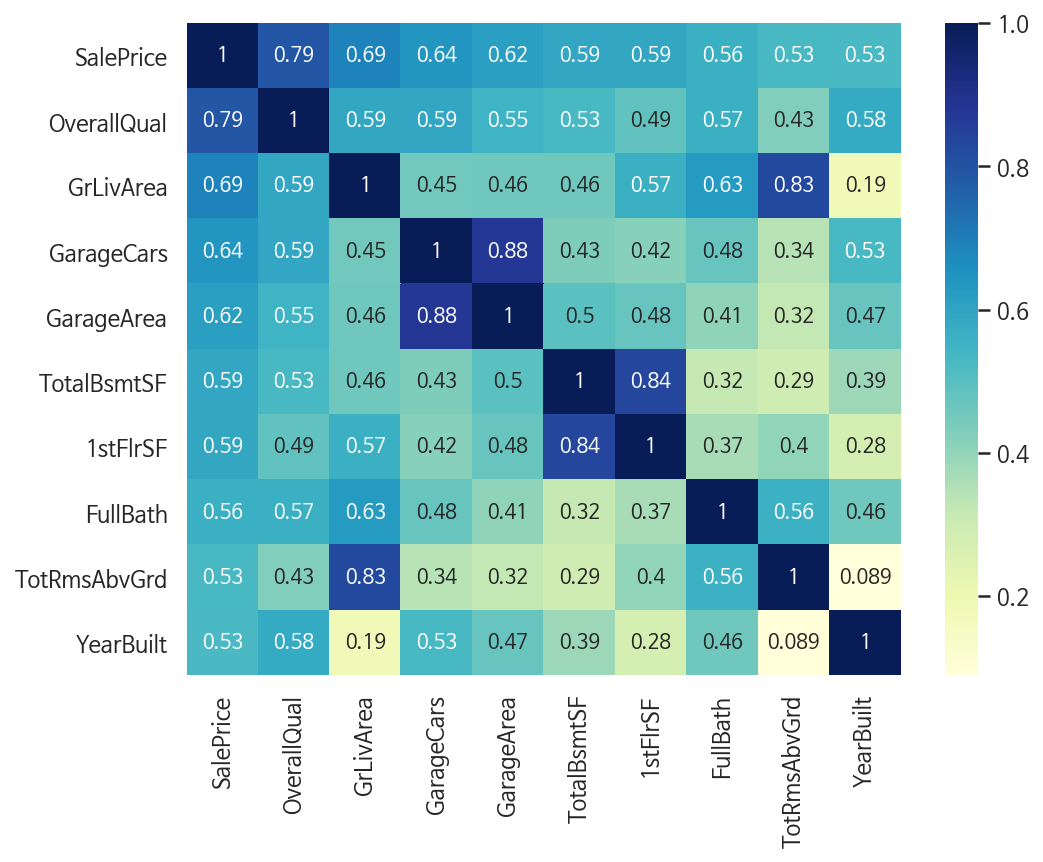

In [88]:
# 'SalePrice' 와 상관관계가 있는 컬럼 상위 10개 히트맵
plt.figure(figsize=(8,6))
sns.heatmap(df_train[corrlist].corr(), annot=True, cmap="YlGnBu")

In [97]:
df_train[corrlist].corr().columns[df_train[corrlist].corr()['SalePrice']> 0.70]

Index(['SalePrice', 'OverallQual'], dtype='object')

In [48]:
# null 있는 컬럼 확인
NA_col = df_train.count().index[df_train.count() != 1021]
len(NA_col)

19